In [120]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [3]:
import pandas as pd
import numpy as np
import io
import time
from tabulate import tabulate
import random

import tensorflow as tf
import tensorflow_federated as tff

In [5]:
@tff.federated_computation
def hello_world():
    return 'Hello, World!'

hello_world()

b'Hello, World!'

In [313]:
data = pd.read_csv('~/Desktop/MedBiot/medbiot_original/fine-grained/raw_dataset/fine_grained_csv/csv_modified/device_data/mod_combined_2000.csv')

In [314]:
data.head()

frame_len frame_protocols  ip_len    ip_flags  ip_ttl  ip_proto  \
0         66             tcp      52  0x00004000      64         6   
1       1514             tcp    1500  0x00004000      64         6   
2         74             tcp      60  0x00004000      64         6   
3         74             tcp      60  0x00004000      64         6   
4         67          telnet      53  0x00004000      64         6   

           ip_src          ip_dst  tcp_srcport  tcp_dstport  ...  \
0   192.168.10.61  192.168.10.199      47518.0         23.0  ...   
1   192.168.10.61  192.168.10.192         80.0      35464.0  ...   
2  192.168.10.190    221.41.1.240      53714.0         23.0  ...   
3  192.168.10.196  136.51.183.121      58538.0         23.0  ...   
4   192.168.10.61  192.168.10.189         23.0      48132.0  ...   

   tcp_window_size  tcp_window_size_scalefactor tcp_time_relative  \
0          43136.0                        128.0          0.746154   
1          30080.0                        128.0          0.026004   
2          29200.0                          NaN          3.134363   
3          29200.0                          NaN          7.231050   
4          29056.0                        128.0       8866.809236   

   tcp_time_delta  tcp_analysis_bytes_in_flight  tcp_analysis_push_bytes_sent  \
0        0.001162                           NaN                           NaN   
1        0.000000                        2896.0                       37648.0   
2        2.078187                           NaN                           NaN   
3        4.083804                           NaN                           NaN   
4        0.004394                           1.0                           1.0   

   is_malware  malware_type  device   phase  
0           1      bashlite    lock      cc  
1           1      bashlite    lock      cc  
2           1      bashlite    lock  spread  
3           1      bashlite    lock  spread  
4           1      bashlite    lock      cc  

[5 rows x 24 columns]

In [315]:
data = data.sample(n=2000)

In [316]:
data.is_malware.value_counts()

0    1006
1     994
Name: is_malware, dtype: int64

In [317]:
headers = data.columns.values
print(headers)

['frame_len' 'frame_protocols' 'ip_len' 'ip_flags' 'ip_ttl' 'ip_proto'
 'ip_src' 'ip_dst' 'tcp_srcport' 'tcp_dstport' 'tcp_len' 'tcp_hdr_len'
 'tcp_flags' 'tcp_window_size_value' 'tcp_window_size'
 'tcp_window_size_scalefactor' 'tcp_time_relative' 'tcp_time_delta'
 'tcp_analysis_bytes_in_flight' 'tcp_analysis_push_bytes_sent'
 'is_malware' 'malware_type' 'device' 'phase']


In [318]:
null_val = []
unique_val = []

for h in headers:
    null_val.append(data[h].isnull().sum())
    unique_val.append(data[h].nunique())

In [319]:
tabs = []

for i in range(len(headers)):
    tabs.append([headers[i], null_val[i], unique_val[i]])
    
print(tabulate(tabs, headers=['Attribute', '# of NaN', '# of Unique Values'], tablefmt='orgtbl'))

| Attribute                    |   # of NaN |   # of Unique Values |
|------------------------------+------------+----------------------|
| frame_len                    |          0 |                   69 |
| frame_protocols              |          0 |                   10 |
| ip_len                       |          0 |                   70 |
| ip_flags                     |          0 |                    2 |
| ip_ttl                       |          0 |                   13 |
| ip_proto                     |          0 |                    4 |
| ip_src                       |          0 |                   87 |
| ip_dst                       |          0 |                  513 |
| tcp_srcport                  |         13 |                  811 |
| tcp_dstport                  |         13 |                  403 |
| tcp_len                      |         25 |                   64 |
| tcp_hdr_len                  |         25 |                    7 |
| tcp_flags                    |  

In [320]:
data.is_malware.value_counts()

0    1006
1     994
Name: is_malware, dtype: int64

In [321]:
null_columns = ['tcp_len', 'tcp_hdr_len', 'tcp_flags', 'tcp_window_size_value', 'tcp_window_size', 
                'tcp_window_size_scalefactor', 'tcp_window_size', 'tcp_time_relative', 'tcp_time_delta', 
                'tcp_analysis_bytes_in_flight', 'tcp_analysis_push_bytes_sent']

In [322]:
data.drop(null_columns, axis=1, inplace=True)

In [323]:
data.dropna(inplace=True)

In [324]:
data.dtypes

frame_len            int64
frame_protocols     object
ip_len               int64
ip_flags            object
ip_ttl               int64
ip_proto             int64
ip_src              object
ip_dst              object
tcp_srcport        float64
tcp_dstport        float64
is_malware           int64
malware_type        object
device              object
phase               object
dtype: object

In [325]:
data.shape[0]

1987

In [326]:
non_pred = ['frame_protocols', 'ip_flags', 'ip_src', 'ip_dst', 'is_malware', 'malware_type', 'device', 'phase']

In [327]:
data2 = data.drop(non_pred, axis=1)

In [328]:
data2.head()

frame_len  ip_len  ip_ttl  ip_proto  tcp_srcport  tcp_dstport
14106         66      52      64         6      40225.0       1883.0
17373         66      52      64         6      47748.0         23.0
10925         60      40      64         6      60922.0        443.0
2141          68      54      64         6      53219.0       1883.0
2534        1474    1460      56         6         80.0      36638.0

In [329]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
data2 = scaler.fit_transform(data2)

In [330]:
data2

array([[4.12654746e-03, 8.21917808e-03, 9.56937799e-02, 1.00000000e+00,
        6.59615290e-01, 3.08691587e-02],
       [4.12654746e-03, 8.21917808e-03, 9.56937799e-02, 1.00000000e+00,
        7.82981584e-01, 3.60850952e-04],
       [0.00000000e+00, 0.00000000e+00, 9.56937799e-02, 1.00000000e+00,
        9.99016087e-01, 7.24982368e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.56937799e-02, 1.00000000e+00,
        1.29548548e-03, 8.17835878e-01],
       [9.62861073e-03, 1.36986301e-02, 9.56937799e-02, 1.00000000e+00,
        6.48119906e-01, 3.60850952e-04],
       [1.00000000e+00, 1.00000000e+00, 9.56937799e-02, 1.00000000e+00,
        5.55582886e-02, 1.46685912e-01]])

In [240]:
data2.ip_ttl.nunique()

10

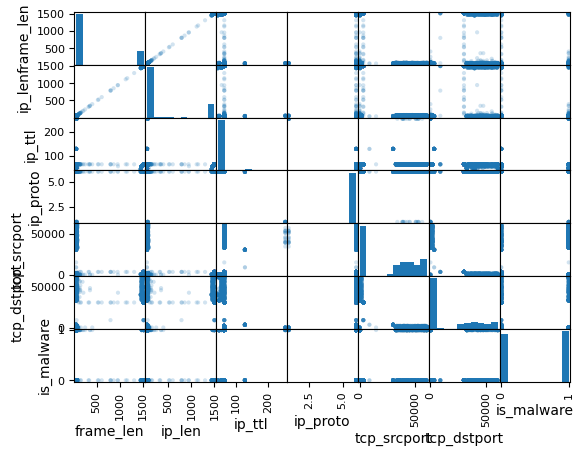

In [241]:
fig = pd.plotting.scatter_matrix(data, alpha=0.2)

In [331]:
data2 = data2.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [332]:
data['header'] = data2.tolist()

In [333]:
preds = ['frame_len', 'ip_len', 'ip_ttl', 'ip_proto', 'tcp_srcport', 'tcp_dstport']

In [334]:
for p in preds:
    data.drop(p, axis=1, inplace=True)

In [335]:
data.head()

frame_protocols    ip_flags          ip_src          ip_dst  is_malware  \
14106             tcp  0x00004000  192.168.10.137  192.168.10.100           0   
17373             tcp  0x00004000  192.168.10.109  192.168.10.165           1   
10925             tcp  0x00004000  192.168.10.107    66.85.157.95           1   
2141             mqtt  0x00004000  192.168.10.171  192.168.10.100           0   
2534              tcp  0x00004000  151.101.36.204  192.168.10.181           0   

      malware_type      device   phase  \
14106        mirai      switch     leg   
17373        torii  raspberry2  spread   
10925        torii  raspberry1  spread   
2141      bashlite       light     leg   
2534      bashlite       light     leg   

                                                  header  
14106  [0.00412654745529574, 0.008219178082191782, 0....  
17373  [0.00412654745529574, 0.008219178082191782, 0....  
10925  [0.0, 0.0, 0.09569377990430622, 1.000000000000...  
2141   [0.005502063273727653, 0.009589041095890413, 0...  
2534   [0.9724896836313618, 0.9726027397260274, 0.057...

In [336]:
print(data2.dtype)

float64


In [337]:
data.device.value_counts()

light         351
switch        346
raspberry2    338
raspberry1    324
lock          316
fan           312
Name: device, dtype: int64

In [338]:
client_id_colname = 'device'

In [339]:
# collect unique devices
client_ids = data[client_id_colname].unique()
# shuffle devices for splitting
np.random.shuffle(client_ids)

In [340]:
print(client_ids)

['raspberry1' 'light' 'fan' 'raspberry2' 'lock' 'switch']


In [341]:
# find what 80% of len(client_ids)
size = int(len(client_ids) * 0.8)
print(size)

4


In [342]:
# split client id into train and test clients
# ensure there are no repeated devices
train_client_ids = np.random.choice(client_ids, size, replace=False).tolist()
test_client_ids = [x for x in client_ids if x not in train_client_ids]

In [343]:
print(len(train_client_ids))
print(len(test_client_ids))

4
2


In [344]:
# define a function that takes client ID and returns a tf.data.Dataset for that client
# The tf.data.Dataset should contain a dictionary 
def create_tf_dataset_for_client_fn(client_id):
    # retrieve only the rows corresponding to this client
    client_data = data[data[client_id_colname] == client_id]
    # filter out rows
    dataset = tf.data.Dataset.from_tensor_slices(client_data.fillna('').to_dict("list"))
    # select the data columns, discarding the client id column
    #dataset = dataset.shuffle(shuffle_buffer).batch(100).repeat(num_epochs)
    return dataset

In [345]:
train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=train_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )
test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=test_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

In [346]:
train_data.element_type_structure

{'frame_protocols': TensorSpec(shape=(), dtype=tf.string, name=None),
 'ip_flags': TensorSpec(shape=(), dtype=tf.string, name=None),
 'ip_src': TensorSpec(shape=(), dtype=tf.string, name=None),
 'ip_dst': TensorSpec(shape=(), dtype=tf.string, name=None),
 'is_malware': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'malware_type': TensorSpec(shape=(), dtype=tf.string, name=None),
 'device': TensorSpec(shape=(), dtype=tf.string, name=None),
 'phase': TensorSpec(shape=(), dtype=tf.string, name=None),
 'header': TensorSpec(shape=(6,), dtype=tf.float32, name=None)}

In [347]:
example_dataset = train_data.create_tf_dataset_for_client(
        train_data.client_ids[0]
    )

example_element = next(iter(example_dataset))

example_element['header'].numpy()

array([4.1265474e-03, 8.2191778e-03, 9.5693782e-02, 1.0000000e+00,
       7.8298157e-01, 3.6085094e-04], dtype=float32)

In [348]:
example_element['header']

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([4.1265474e-03, 8.2191778e-03, 9.5693782e-02, 1.0000000e+00,
       7.8298157e-01, 3.6085094e-04], dtype=float32)>

In [349]:
print("Dataset Type: ", type(example_dataset), "\n")
print("Length: ", len(example_dataset), "\n")
print("Example Element: ", example_element, "\n")
print(example_element['is_malware'].numpy())

Dataset Type:  <class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'> 

Length:  338 

Example Element:  {'frame_protocols': <tf.Tensor: shape=(), dtype=string, numpy=b'tcp'>, 'ip_flags': <tf.Tensor: shape=(), dtype=string, numpy=b'0x00004000'>, 'ip_src': <tf.Tensor: shape=(), dtype=string, numpy=b'192.168.10.109'>, 'ip_dst': <tf.Tensor: shape=(), dtype=string, numpy=b'192.168.10.165'>, 'is_malware': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'malware_type': <tf.Tensor: shape=(), dtype=string, numpy=b'torii'>, 'device': <tf.Tensor: shape=(), dtype=string, numpy=b'raspberry2'>, 'phase': <tf.Tensor: shape=(), dtype=string, numpy=b'spread'>, 'header': <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([4.1265474e-03, 8.2191778e-03, 9.5693782e-02, 1.0000000e+00,
       7.8298157e-01, 3.6085094e-04], dtype=float32)>} 

1


In [350]:
import collections

In [351]:
NUM_CLIENTS = 1
# An integer representing the number of passes each client performs over its entire local dataset.
# The number of epochs is the number of complete passes through the training dataset
NUM_EPOCHS = 1000 #change to 200
# An integer representing the batch size used when iterating over client datasets.
# The batch size is a number of samples processed before the model is updated
BATCH_SIZE = 32
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

In [368]:
def preprocess(dataset):
    def batch_format_fn(element):
        """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
        return collections.OrderedDict(
            x=tf.reshape(element['header'], [-1, 6]),
            y=tf.reshape(element['is_malware'], [-1, 1]))
    return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [372]:
preprocessed_example_dataset = preprocess(example_dataset)
#print(preprocessed_example_dataset)
#print(preprocessed_example_dataset)
list(preprocessed_example_dataset)
#print(len(preprocessed_example_dataset))

[OrderedDict([('x',
               <tf.Tensor: shape=(32, 6), dtype=float32, numpy=
               array([[1.0000000e+00, 1.0000000e+00, 9.5693782e-02, 1.0000000e+00,
                       1.2954855e-03, 6.8533796e-01],
                      [4.1265474e-03, 8.2191778e-03, 9.5693782e-02, 1.0000000e+00,
                       7.8298157e-01, 3.6085094e-04],
                      [4.1265474e-03, 8.2191778e-03, 9.5693782e-02, 1.0000000e+00,
                       6.5330184e-01, 7.2498238e-03],
                      [1.0000000e+00, 1.0000000e+00, 9.5693782e-02, 1.0000000e+00,
                       1.2954855e-03, 7.7610838e-01],
                      [4.8143053e-03, 8.9041097e-03, 9.5693782e-02, 1.0000000e+00,
                       3.6076811e-04, 9.9714601e-01],
                      [1.2379643e-02, 1.6438356e-02, 9.5693782e-02, 1.0000000e+00,
                       3.6076811e-04, 5.6068039e-01],
                      [1.0000000e+00, 1.0000000e+00, 9.5693782e-02, 1.0000000e+00,
           

In [354]:
sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

In [355]:
def make_federated_data(client_data, client_ids):
    return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

In [356]:
sample_clients = train_data.client_ids[0:NUM_CLIENTS]
federated_train_data = make_federated_data(train_data, sample_clients)
print(f'Number of client datasets: {len(federated_train_data)}')
print(f'First dataset: {federated_train_data[0]}')

Number of client datasets: 1
First dataset: <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>


In [357]:
# def create_keras_model():
#     return tf.keras.models.Sequential([
#       tf.keras.layers.InputLayer(input_shape=(6,)),
#       tf.keras.layers.Dropout(0.4),
#       tf.keras.layers.Dense(6, activation='relu'),
#       tf.keras.layers.Dropout(0.4),
#       tf.keras.layers.Dense(4, activation='relu'),
#       tf.keras.layers.Dropout(0.4),
#       tf.keras.layers.Dense(4, activation='relu'),
#       tf.keras.layers.Dropout(0.4),        
#       tf.keras.layers.Softmax(),
#   ])

In [396]:
def create_keras_model():
    return tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(6,)),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(6, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dropout(0.4), 
      tf.keras.layers.Dense(1, activation='softmax')
  ])

In [397]:
def model_fn():
    # We _must_ create a new model here, and _not_ capture it from an external
    # scope. TFF will call this within different graph contexts.
    keras_model = create_keras_model()
    return tff.learning.from_keras_model(
        keras_model,
        input_spec=preprocessed_example_dataset.element_spec,
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.Accuracy(), 
                 tf.keras.metrics.Recall(), 
                 tf.keras.metrics.TruePositives(), 
                 tf.keras.metrics.TrueNegatives(), 
                 tf.keras.metrics.FalsePositives(), 
                 tf.keras.metrics.FalseNegatives()])

In [406]:
iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.0002),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.0001))

In [407]:
print(iterative_process.initialize.type_signature.formatted_representation())

( -> <
  global_model_weights=<
    trainable=<
      float32[6,6],
      float32[6],
      float32[6,4],
      float32[4],
      float32[4,4],
      float32[4],
      float32[4,1],
      float32[1]
    >,
    non_trainable=<>
  >,
  distributor=<>,
  client_work=<>,
  aggregator=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  finalizer=<
    int64
  >
>@SERVER)


In [408]:
state = iterative_process.initialize()

In [409]:
start2 = time.time()
result = iterative_process.next(state, federated_train_data)
state = result.state
metrics = result.metrics
print('round  1, metrics={}'.format(metrics))
end2 = time.time()
print("\nTime of Round: ",round((end2-start2),2),"sec")

round  1, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('accuracy', 0.0), ('recall', 1.0), ('true_positives', 169000.0), ('true_negatives', 0.0), ('false_positives', 169000.0), ('false_negatives', 0.0), ('loss', 7.6666574), ('num_examples', 338000), ('num_batches', 10563)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])

Time of Round:  9.73 sec


In [364]:
print(federated_train_data)

[<PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>]


In [292]:
list(metrics.items())

[('distributor', ()),
 ('client_work',
  OrderedDict([('train',
                OrderedDict([('accuracy', 0.0),
                             ('recall', 1.0),
                             ('true_positives', 32800.0),
                             ('true_negatives', 0.0),
                             ('false_positives', 33000.0),
                             ('false_negatives', 0.0),
                             ('loss', 7.689951),
                             ('num_examples', 65800),
                             ('num_batches', 2057)]))])),
 ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])),
 ('finalizer', ())]

In [293]:
NUM_ROUNDS = 20

In [294]:
for round_num in range(2, NUM_ROUNDS):
    result = iterative_process.next(state, federated_train_data)
    state = result.state
    metrics = result.metrics
    print('round {:2d}, metrics={}'.format(round_num, metrics))

round  2, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('accuracy', 0.0), ('recall', 1.0), ('true_positives', 32800.0), ('true_negatives', 0.0), ('false_positives', 33000.0), ('false_negatives', 0.0), ('loss', 7.689952), ('num_examples', 65800), ('num_batches', 2057)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])
round  3, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('accuracy', 0.0), ('recall', 1.0), ('true_positives', 32800.0), ('true_negatives', 0.0), ('false_positives', 33000.0), ('false_negatives', 0.0), ('loss', 7.6899543), ('num_examples', 65800), ('num_batches', 2057)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])
round  4, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('accuracy', 0.0), ('recall', 1.0), ('true_positives', 32800.0)

In [194]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [195]:
logdir = "/tmp/logs/scalars/training/"
summary_writer = tf.summary.create_file_writer(logdir)
state = iterative_process.initialize()

In [196]:
with summary_writer.as_default():
    for round_num in range(1, NUM_ROUNDS):
        result = iterative_process.next(state, federated_train_data)
        state = result.state
        metrics = result.metrics
        for name, value in metrics['client_work']['train'].items():
            tf.summary.scalar(name, value, step=round_num)

In [197]:
!ls {logdir}
%tensorboard --logdir {logdir} --port=0

events.out.tfevents.1666638959.bhunias-server.1481749.0.v2
events.out.tfevents.1667330348.bhunias-server.1845230.0.v2
events.out.tfevents.1667493501.bhunias-server.1955529.0.v2
events.out.tfevents.1668186557.bhunias-server.2212823.0.v2
events.out.tfevents.1668454451.bhunias-server.2344332.0.v2
events.out.tfevents.1668454568.bhunias-server.2344332.1.v2
events.out.tfevents.1668454784.bhunias-server.2344332.2.v2
events.out.tfevents.1668478683.bhunias-server.2406712.0.v2
events.out.tfevents.1668542132.bhunias-server.2497039.0.v2
events.out.tfevents.1668542436.bhunias-server.2497039.1.v2
events.out.tfevents.1668543012.bhunias-server.2497039.2.v2
events.out.tfevents.1668544794.bhunias-server.2497039.3.v2


In [77]:
evaluation = tff.learning.build_federated_evaluation(model_fn)

In [78]:
print(evaluation.type_signature.formatted_representation())

(<
  server_model_weights=<
    trainable=<
      float32[6,6],
      float32[6],
      float32[6,4],
      float32[4],
      float32[4,4],
      float32[4]
    >,
    non_trainable=<>
  >@SERVER,
  federated_dataset={<
    x=float32[?,6],
    y=int32[?,1]
  >*}@CLIENTS
> -> <
  eval=<
    binary_accuracy=float32,
    loss=float32,
    num_examples=int64,
    num_batches=int64
  >
>@SERVER)


In [80]:
model_weights = iterative_process.get_model_weights(state)
train_metrics = evaluation(model_weights, federated_train_data)

In [81]:
str(train_metrics)

"OrderedDict([('eval', OrderedDict([('binary_accuracy', 0.5016773), ('loss', 0.83514535), ('num_examples', 47696), ('num_batches', 746)]))])"

In [86]:
sample_clients = test_data.client_ids
federated_test_data = make_federated_data(test_data, sample_clients)

len(federated_test_data), federated_test_data[0]

(2,
 <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>)

In [87]:
test_metrics = evaluation(model_weights, federated_test_data)

In [88]:
str(test_metrics)

"OrderedDict([('eval', OrderedDict([('binary_accuracy', 0.49367088), ('loss', 0.843941), ('num_examples', 31600), ('num_batches', 495)]))])"